In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.shape

(1143, 13)

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(1143, 13)

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
df['quality'] = df['quality'] - 2

In [11]:
df['quality'].unique()

array([3, 4, 5, 2, 6, 1], dtype=int64)

In [12]:
df = df.drop(columns=['Id'])

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3


In [14]:
def onehot_encoding(y):
    num_classes = y.max() + 1
    encoded = np.zeros((len(y), num_classes))
    encoded[np.arange(len(y)), y.values.flatten()] = 1
    return encoded

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)


In [17]:
y.max()

6

In [18]:
len(np.unique(y))

6

In [19]:
y_encoded = onehot_encoding(y)

In [20]:
indices = np.arange(len(df))
np.random.shuffle(indices)
X_shuffled = X.iloc[indices]
y_shuffled = y_encoded[indices]

split_ratio = 0.8 
split_index = int(len(df) * split_ratio)

X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]

In [21]:
from mlp import MLP
from mlp import Layer

In [22]:
input_layer = Layer(11, 256, "relu")
hidden_layer1 = Layer(256, 512, "relu")
hidden_layer2 = Layer(512, 128, "relu")
output_layer = Layer(128, 7, "None")


In [23]:
layers = []
layers.append(input_layer)
layers.append(hidden_layer1)
layers.append(hidden_layer2)
layers.append(output_layer)

In [25]:
model = MLP(layers, lr=0.1)
train_acc, val_acc, classification_reports, train_losses = model.fit(X_train, y_train, X_test, y_test,batch_size=10, epochs=100)

Text(0, 0.5, 'accuracy')

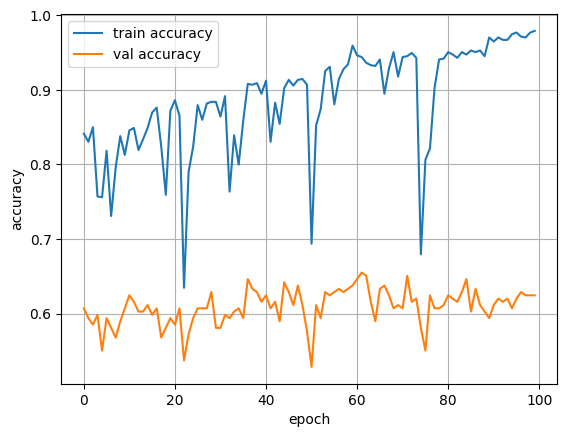

In [26]:
import matplotlib.pyplot as plt
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [28]:
classification_reports

[({'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4},
   '2': {'precision': 0.8,
    'recall': 0.8571428571428571,
    'f1-score': 0.8275862068965518,
    'support': 28},
   '3': {'precision': 0.8325471698113207,
    'recall': 0.926509186351706,
    'f1-score': 0.8770186335403726,
    'support': 381},
   '4': {'precision': 0.8262032085561497,
    'recall': 0.824,
    'f1-score': 0.8251001335113485,
    'support': 375},
   '5': {'precision': 0.9620253164556962,
    'recall': 0.6785714285714286,
    'f1-score': 0.7958115183246074,
    'support': 112},
   '6': {'precision': 1.0,
    'recall': 0.21428571428571427,
    'f1-score': 0.35294117647058826,
    'support': 14},
   'accuracy': 0.8413566739606126,
   'macro avg': {'precision': 0.9034626158038611,
    'recall': 0.750084864391951,
    'f1-score': 0.779742944790578,
    'support': 914},
   'weighted avg': {'precision': 0.8481110616517585,
    'recall': 0.8413566739606126,
    'f1-score': 0.836762724028102,
    'supp

In [27]:
from sklearn.metrics import classification_report
recalls = []
precisions = []
f1_scores = []
for report in classification_reports:
    recalls.append(report['recall'])
    precisions.append(report['precision'])
    f1_scores.append(report['f1-score'])

TypeError: tuple indices must be integers or slices, not str

In [29]:
from sklearn.metrics import classification_report

recalls_train = []
precisions_train = []
f1_scores_train = []

recalls_val = []
precisions_val = []
f1_scores_val = []

for train_report, val_report in classification_reports:
    recalls_train.append(train_report['macro avg']['recall'])
    precisions_train.append(train_report['macro avg']['precision'])
    f1_scores_train.append(train_report['macro avg']['f1-score'])

    recalls_val.append(val_report['macro avg']['recall'])
    precisions_val.append(val_report['macro avg']['precision'])
    f1_scores_val.append(val_report['macro avg']['f1-score'])


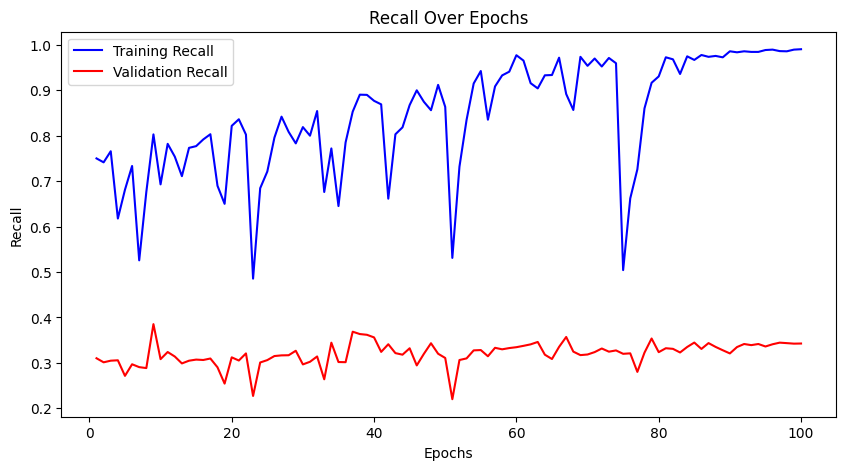

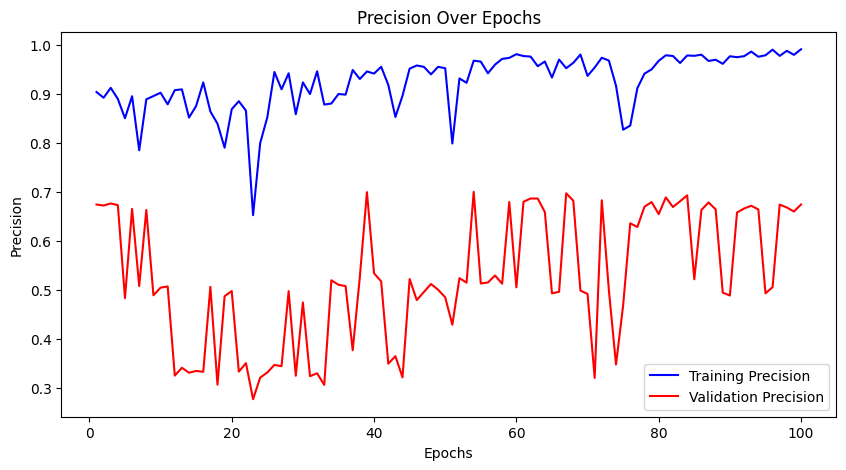

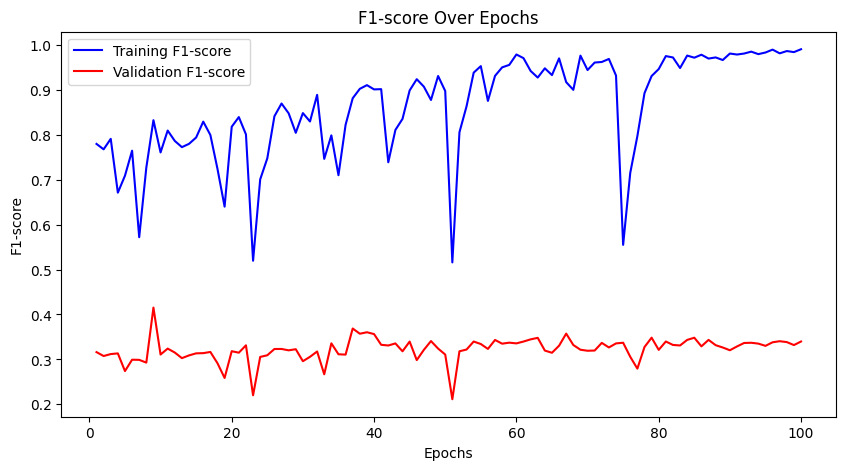

In [30]:
import matplotlib.pyplot as plt

# Assuming you have already collected recalls_train, precisions_train, f1_scores_train, 
# recalls_val, precisions_val, f1_scores_val lists

epochs = range(1, len(recalls_train) + 1)  # Assuming the length of lists is equal to the number of epochs

# Plotting recall
plt.figure(figsize=(10, 5))
plt.plot(epochs, recalls_train, 'b', label='Training Recall')
plt.plot(epochs, recalls_val, 'r', label='Validation Recall')
plt.title('Recall Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Plotting precision
plt.figure(figsize=(10, 5))
plt.plot(epochs, precisions_train, 'b', label='Training Precision')
plt.plot(epochs, precisions_val, 'r', label='Validation Precision')
plt.title('Precision Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plotting F1-score
plt.figure(figsize=(10, 5))
plt.plot(epochs, f1_scores_train, 'b', label='Training F1-score')
plt.plot(epochs, f1_scores_val, 'r', label='Validation F1-score')
plt.title('F1-score Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1-score')
plt.legend()
plt.show()


Text(0, 0.5, 'accuracy')

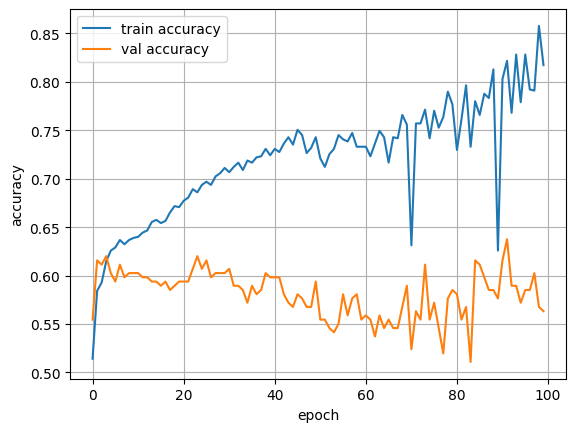

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label='val accuracy')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0.5, 0, 'epoch')

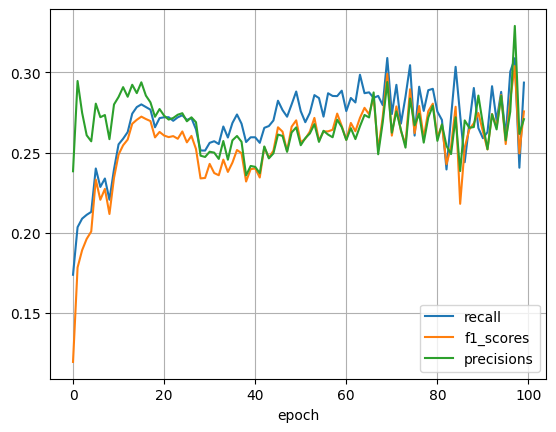

In [27]:
plt.plot(recalls, label='recall')
plt.plot(f1_scores, label='f1_scores')
plt.plot(precisions, label='precisions')
plt.legend()
plt.grid()
plt.xlabel('epoch')

In [24]:
model = MLP(layers, lr=0.1)
train_acc, test_acc, f1_scores, recalls, precisions = model.fit(X_train, y_train, X_test, y_test,batch_size=10, epochs=300)

Text(0, 0.5, 'accuracy')

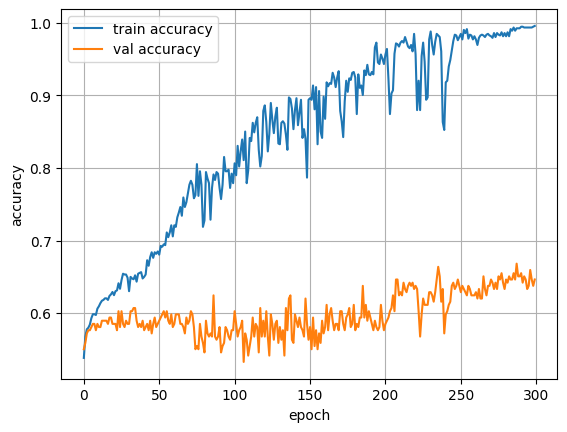

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label='val accuracy')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0.5, 0, 'epoch')

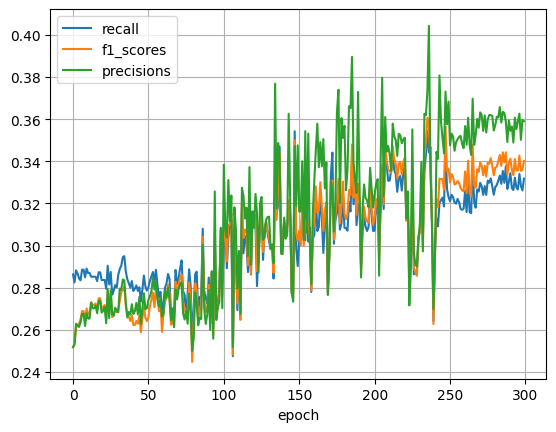

In [26]:
plt.plot(recalls, label='recall')
plt.plot(f1_scores, label='f1_scores')
plt.plot(precisions, label='precisions')
plt.legend()
plt.grid()
plt.xlabel('epoch')

In [24]:
import numpy as np

# Define the range and the number of points
start = 1e-8
end = 10
num_points = 15

# Generate equally spaced numbers using geometric progression
lrs = np.geomspace(start, end, num_points)

print(lrs)


[1.00000000e-08 4.39397056e-08 1.93069773e-07 8.48342898e-07
 3.72759372e-06 1.63789371e-05 7.19685673e-05 3.16227766e-04
 1.38949549e-03 6.10540230e-03 2.68269580e-02 1.17876863e-01
 5.17947468e-01 2.27584593e+00 1.00000000e+01]


In [25]:
input_layer = Layer(11, 128, "relu")
hidden_layer1 = Layer(128, 64, "relu")
output_layer = Layer(64, 7, "None")

layers = []
layers.append(input_layer)
layers.append(hidden_layer1)
layers.append(output_layer)


In [26]:
losses = []
for lr in lrs:
    model = MLP(layers, lr=lr)
    train_acc, test_acc, f1_scores, recalls, precisions, train_losses = model.fit(X_train, y_train, X_test, y_test, epochs=100)
    losses.append(train_losses)
    print(f"Learning Rate: {lr}, Train Accuracy: {train_acc[-1]}, Validation Accuracy: {test_acc[-1]}")

Learning Rate: 1e-08, Train Accuracy: 0.0700218818380744, Validation Accuracy: 0.056768558951965066
Learning Rate: 4.393970560760795e-08, Train Accuracy: 0.0711159737417943, Validation Accuracy: 0.0611353711790393
Learning Rate: 1.9306977288832497e-07, Train Accuracy: 0.07768052516411379, Validation Accuracy: 0.06550218340611354
Learning Rate: 8.483428982440726e-07, Train Accuracy: 0.10722100656455143, Validation Accuracy: 0.10043668122270742
Learning Rate: 3.727593720314938e-06, Train Accuracy: 0.25054704595185995, Validation Accuracy: 0.2183406113537118
Learning Rate: 1.6378937069540647e-05, Train Accuracy: 0.4059080962800875, Validation Accuracy: 0.3799126637554585
Learning Rate: 7.196856730011529e-05, Train Accuracy: 0.5667396061269147, Validation Accuracy: 0.5109170305676856
Learning Rate: 0.00031622776601683794, Train Accuracy: 0.5754923413566739, Validation Accuracy: 0.5720524017467249
Learning Rate: 0.001389495494373139, Train Accuracy: 0.6301969365426696, Validation Accuracy: 

In [27]:
losses

[[0.2882522114210701,
  0.2882518006649259,
  0.2882513899105838,
  0.28825097915804354,
  0.28825056840730523,
  0.288250157658369,
  0.28824974691123467,
  0.2882493361659023,
  0.2882489254223719,
  0.2882485146806433,
  0.28824810394071665,
  0.2882476932025919,
  0.28824728246626913,
  0.28824687173174823,
  0.2882464609990291,
  0.28824605026811917,
  0.28824563953938864,
  0.28824522881246,
  0.2882448180873332,
  0.2882444073640082,
  0.2882439966424849,
  0.2882435859227634,
  0.2882431752048435,
  0.2882427644887254,
  0.2882423537744091,
  0.28824194306189443,
  0.2882415323511816,
  0.28824112164227034,
  0.28824071099384274,
  0.28824030035969006,
  0.2882398897273384,
  0.28823947909678804,
  0.2882390684680388,
  0.28823865784109093,
  0.28823824721594404,
  0.2882378365925985,
  0.28823742597105406,
  0.28823701535131074,
  0.2882366047368143,
  0.2882361941252134,
  0.2882357835154137,
  0.28823537290741497,
  0.2882349623012174,
  0.288234551696821,
  0.28823414109422

In [29]:
loss_means = [np.mean(inner_list) for inner_list in losses]

In [34]:
len(loss_means)

15

Text(0, 0.5, 'train loss')

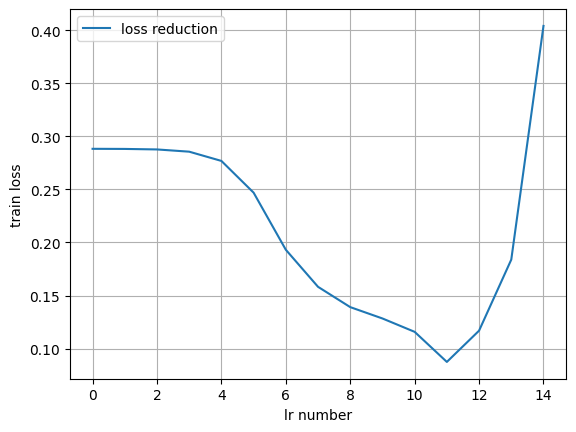

In [35]:
import matplotlib.pyplot as plt
plt.plot(loss_means, label='loss reduction')
plt.legend()
plt.grid()
plt.xlabel('lr number')
plt.ylabel('train loss')

In [28]:
losses = []
for lr in lrs:
    model = MLP(layers, lr=lr)
    train_acc, test_acc, f1_scores, recalls, precisions = model.fit(X_train, y_train, X_test, y_test, epochs=100)
    print(f"Learning Rate: {lr}, Train Accuracy: {train_acc[-1]}, Validation Accuracy: {test_acc[-1]}")

Learning Rate: 1e-08, Train Accuracy: 0.0087527352297593, Validation Accuracy: 0.004366812227074236
Learning Rate: 4.393970560760795e-08, Train Accuracy: 0.0087527352297593, Validation Accuracy: 0.004366812227074236
Learning Rate: 1.9306977288832497e-07, Train Accuracy: 0.0087527352297593, Validation Accuracy: 0.004366812227074236
Learning Rate: 8.483428982440726e-07, Train Accuracy: 0.009846827133479213, Validation Accuracy: 0.004366812227074236
Learning Rate: 3.727593720314938e-06, Train Accuracy: 0.22647702407002188, Validation Accuracy: 0.22707423580786026
Learning Rate: 1.6378937069540647e-05, Train Accuracy: 0.3938730853391685, Validation Accuracy: 0.39737991266375544
Learning Rate: 7.196856730011529e-05, Train Accuracy: 0.43544857768052514, Validation Accuracy: 0.462882096069869
Learning Rate: 0.00031622776601683794, Train Accuracy: 0.5448577680525164, Validation Accuracy: 0.5895196506550219
Learning Rate: 0.001389495494373139, Train Accuracy: 0.5929978118161926, Validation Accu

In [ ]:
plt.figure(figsize=(10, 6))
for i, lr in enumerate(lrs):
    plt.plot(range(len(train_losses[i])), train_losses[i], label=f'LR: {lr}')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Train Loss for Different Learning Rates')
plt.legend()
plt.show()

In [25]:
train_acc

[0.5722100656455142,
 0.5404814004376368,
 0.5547045951859956,
 0.5678336980306345,
 0.5776805251641138,
 0.5809628008752735,
 0.5809628008752735,
 0.5929978118161926,
 0.5940919037199125,
 0.5940919037199125,
 0.5951859956236324,
 0.5919037199124726,
 0.5940919037199125,
 0.600656455142232,
 0.6028446389496718,
 0.6061269146608315,
 0.611597374179431,
 0.6181619256017505,
 0.6159737417943107,
 0.6181619256017505,
 0.6181619256017505,
 0.6225382932166302,
 0.6291028446389497,
 0.6312910284463895,
 0.6323851203501094,
 0.6301969365426696,
 0.6291028446389497,
 0.6269146608315098,
 0.6280087527352297,
 0.6301969365426696,
 0.6345733041575492,
 0.6345733041575492,
 0.6345733041575492,
 0.637855579868709,
 0.637855579868709,
 0.6400437636761488,
 0.6411378555798687,
 0.6400437636761488,
 0.6400437636761488,
 0.6400437636761488,
 0.6422319474835886,
 0.6444201312910285,
 0.6444201312910285,
 0.6433260393873085,
 0.6444201312910285,
 0.6477024070021882,
 0.649890590809628,
 0.648796498905908

In [26]:
test_acc

[0.5764192139737991,
 0.519650655021834,
 0.5152838427947598,
 0.5327510917030568,
 0.5633187772925764,
 0.5895196506550219,
 0.5895196506550219,
 0.5982532751091703,
 0.5982532751091703,
 0.6026200873362445,
 0.6026200873362445,
 0.5938864628820961,
 0.5982532751091703,
 0.5938864628820961,
 0.5895196506550219,
 0.5938864628820961,
 0.5938864628820961,
 0.5982532751091703,
 0.5982532751091703,
 0.6026200873362445,
 0.5982532751091703,
 0.5982532751091703,
 0.5895196506550219,
 0.5895196506550219,
 0.5895196506550219,
 0.5895196506550219,
 0.5895196506550219,
 0.5895196506550219,
 0.5895196506550219,
 0.5982532751091703,
 0.5982532751091703,
 0.5982532751091703,
 0.6026200873362445,
 0.6026200873362445,
 0.6069868995633187,
 0.6069868995633187,
 0.6069868995633187,
 0.6069868995633187,
 0.6069868995633187,
 0.6026200873362445,
 0.611353711790393,
 0.6069868995633187,
 0.6069868995633187,
 0.6069868995633187,
 0.6157205240174672,
 0.6157205240174672,
 0.6157205240174672,
 0.620087336244

Text(0, 0.5, 'accuracy')

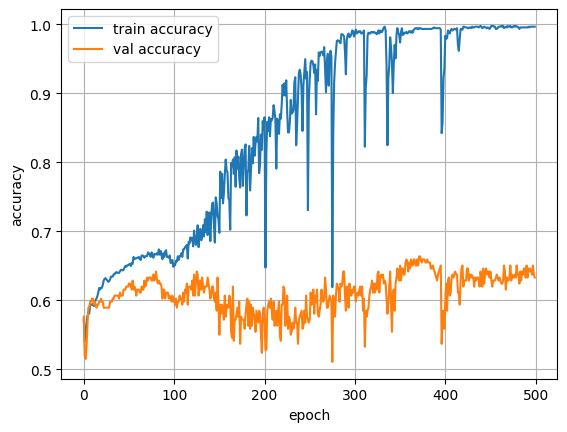

In [27]:
import matplotlib.pyplot as plt
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label='val accuracy')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [28]:
min_lr = 1e-8
max_lr = 10
num_lr = 15

learning_rates = np.logspace(np.log10(min_lr), np.log10(max_lr), num=num_lr)

Learning Rate: 1e-08, Train Accuracy: 0.9967177242888403, Validation Accuracy: 0.6331877729257642
Learning Rate: 4.393970560760795e-08, Train Accuracy: 0.9967177242888403, Validation Accuracy: 0.6331877729257642
Learning Rate: 1.9306977288832497e-07, Train Accuracy: 0.9967177242888403, Validation Accuracy: 0.6331877729257642
Learning Rate: 8.483428982440726e-07, Train Accuracy: 0.9967177242888403, Validation Accuracy: 0.6331877729257642
Learning Rate: 3.727593720314938e-06, Train Accuracy: 0.9967177242888403, Validation Accuracy: 0.6331877729257642
Learning Rate: 1.6378937069540647e-05, Train Accuracy: 0.9967177242888403, Validation Accuracy: 0.6375545851528385
Learning Rate: 7.196856730011529e-05, Train Accuracy: 0.9978118161925602, Validation Accuracy: 0.6419213973799127
Learning Rate: 0.00031622776601683794, Train Accuracy: 0.9989059080962801, Validation Accuracy: 0.6331877729257642
Learning Rate: 0.001389495494373139, Train Accuracy: 1.0, Validation Accuracy: 0.62882096069869
Learn

d:\term 6\Neural Network\mlp.py:87: RuntimeWarning: invalid value encountered in multiply
  sigma = np.multiply(np.dot(sigma, w_next.T), self.grad_activation(wx))


Learning Rate: 0.5179474679231223, Train Accuracy: 0.0, Validation Accuracy: 0.0
Learning Rate: 2.275845926074791, Train Accuracy: 0.0, Validation Accuracy: 0.0
Learning Rate: 10.0, Train Accuracy: 0.0, Validation Accuracy: 0.0


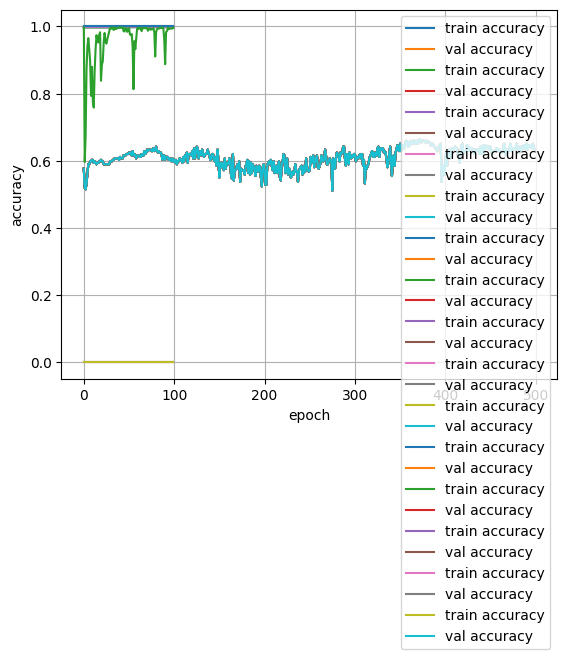

In [30]:
for lr in learning_rates:
    # Create and initialize your model (assuming model is already defined)
    model = MLP(layers, lr=lr)
    
    # Train the model using the fit method
    train_acc, val_acc = model.fit(X_train, y_train, X_test, y_test, epochs=100)
    
    # Print or store the results for this learning rate
    print(f"Learning Rate: {lr}, Train Accuracy: {train_acc[-1]}, Validation Accuracy: {val_acc[-1]}")
    plt.plot(train_acc, label='train accuracy')
    plt.plot(test_acc, label='val accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')